In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
pd.pandas.set_option('display.max_columns',None)

In [7]:
rm=pd.read_csv("1. Regression - Module - (Housing Prices).csv")

In [8]:
rm.head(5)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [9]:
rm.shape

(21613, 21)

In [10]:
rm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [11]:
rm.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [11]:
numerical_features=[feature for feature in rm.columns if rm[feature].dtypes !='O']
print('Number of numerical variables:',len(numerical_features))
rm[numerical_features].head()

Number of numerical variables: 17


,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [14]:
rm['No of Bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

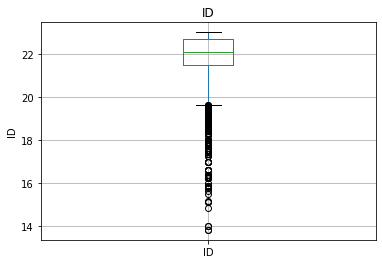

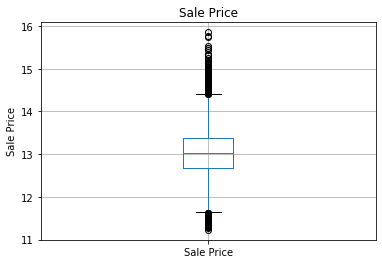

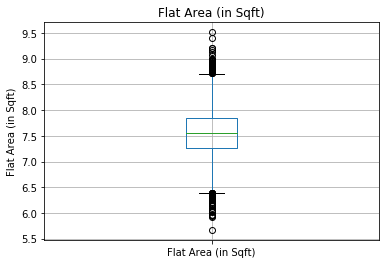

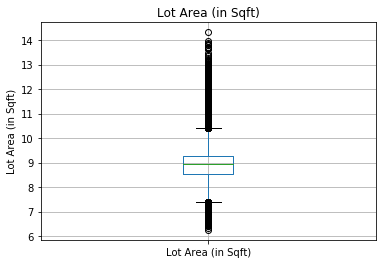

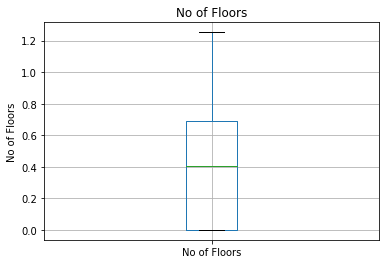

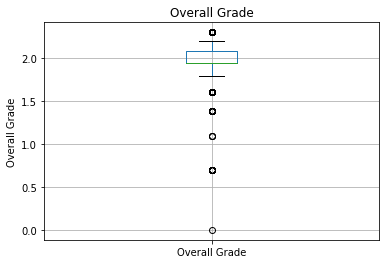

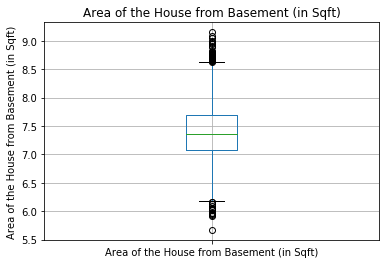

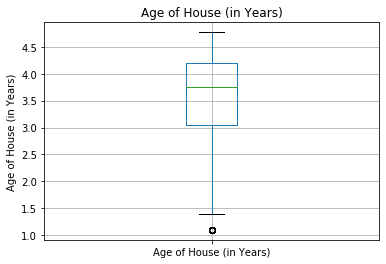

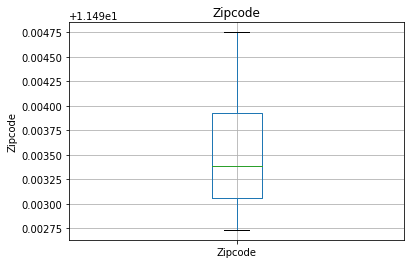

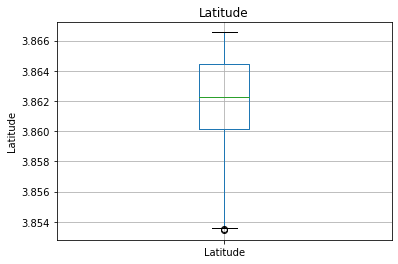

C:\Users\Sameer\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


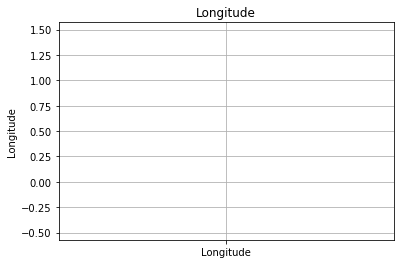

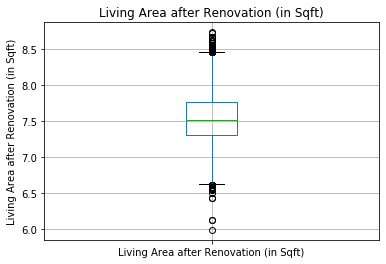

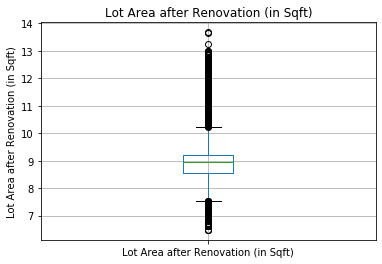

In [12]:
for feature in numerical_features:
    data=rm.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [1]:
categorical_features=[feature for feature in rm.columns if data[feature].dtypes=='O']

NameError: name 'rm' is not defined

In [17]:
categorical_features

['Date House was Sold',
 'Waterfront View',
 'No of Times Visited',
 'Condition of the House']

In [18]:
rm[categorical_features].head()

,Date House was Sold,Waterfront View,No of Times Visited,Condition of the House
0,14-Oct-17,No,None,Fair
1,14-Dec-17,No,None,Fair
2,15-Feb-16,No,None,Fair
3,14-Dec-17,No,None,Excellent
4,15-Feb-16,No,None,Fair


In [19]:
for feature in categorical_features:
    print('the feature is {} and number of categories are {}'.format(feature,len(rm[feature].unique())))

the feature is Date House was Sold and number of categories are 13
the feature is Waterfront View and number of categories are 2
the feature is No of Times Visited and number of categories are 5
the feature is Condition of the House and number of categories are 5


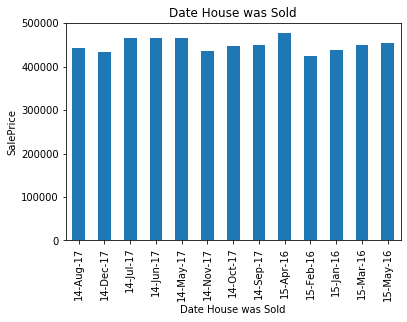

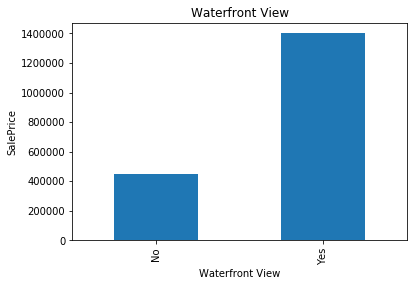

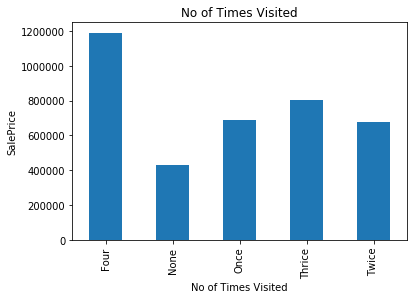

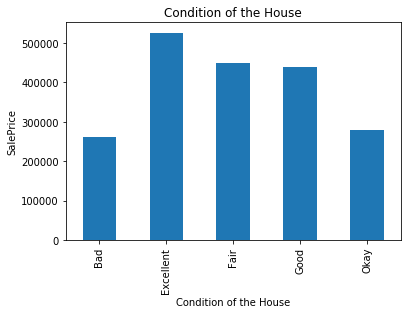

In [22]:
for feature in categorical_features:
    data=rm.copy()
    data.groupby(feature)['Sale Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()